<p>
Prepared by Vytautas Bielinskas. 2020. <br>
Download data from: https://finance.yahoo.com/quote/GOOG/history/
</p>

<h2>PART 1. Data Pre-processing</h2>

<h3>Step #0. Fire the system</h3>

In [2]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import plotly.graph_objects as go # for visualization
import os
import sys 
sys.path.append("../Function/")
import function
from function import remove_high_corr,remove_outliers,plot_line,plot_residuals

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

<h3>Step #1. Read data</h3>

In [3]:
# Importing Training Set
df = pd.read_excel('../../site_info_ver_4.xlsx')

Index(['Date', 'Site_Name', 'Israelis_Count', 'Tourists_Count', 'Total',
       'region_Central', 'region_Judea_Samaria', 'region_North',
       'region_South', 'is_weekend', 'operations', 'is_jewish_holiday',
       'is_jewish_vacation', 'is_muslims_holiday', 'is_muslims_vacation',
       'is_camping', 'special_activity', 'visit_duration', 'is_jewishHeritage',
       'is_muslimsHeritage', 'is_christiansHeritage', 'is_nationalPark',
       'is_natureReserve', 'is_archaeology', 'is_religion', 'is_animals',
       'is_heritage', 'is_water', 'is_cave', 'is_lookout', 'pm10', 'pm2.5',
       'nox', 'so2', 'Temperature', 'is_HeatWave', 'Tel_Aviv-Yafo_pm10',
       'Jerusalem_pm10', 'Haifa_pm10', 'Ashkelon_pm10', 'Beer-Sheva_pm10',
       'Tel_Aviv-Yafo_pm2.5', 'Jerusalem_pm2.5', 'Haifa_pm2.5',
       'Ashkelon_pm2.5', 'Beer-Sheva_pm2.5', 'Tel_Aviv-Yafo_nox',
       'Jerusalem_nox', 'Haifa_nox', 'Ashkelon_nox', 'Beer-Sheva_nox',
       'Tel_Aviv-Yafo_so2', 'Jerusalem_so2', 'Haifa_so2', 'Ashke

,Israelis_Count,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,...,_Tel Arad,_Tel Beer Sheva,_Tel Dan,_Tel Hazor,_Tel Megiddo,_The Majrase – Betiha,_The Masada,_Tzipori,_Yehiam,_Yehudiya
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,7,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-03,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-08,14,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-10,35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-11,35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,157,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2021-05-18,796,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-19,708,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


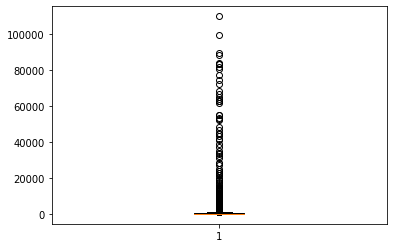

In [4]:
print(df.columns)
# dataset = df[df.Site_Name==df.Site_Name.unique()[1]]
dataset = df.copy()
# site_name=df.Site_Name.unique()[1]
# dataset_train.set_index("Date",inplace=True)
dataset.head(1)
dataset[['so2','nox','pm10','pm2.5']].isna().sum()
dataset.drop(['so2','nox','pm10','pm2.5'],axis=1,inplace=True)
dataset.drop(['Tourists_Count','Total'],axis=1,inplace=True)

dataset = function.split_date(dataset)
dataset.set_index('Date',inplace=True)

dataset = pd.get_dummies(dataset,'')
dataset = function.remove_outliers(dataset, 'Israelis_Count')

dataset

In [5]:
# size=round(len(dataset)*.8)
# dataset_train = dataset[:size]
# dataset_test = dataset[size:]
X = dataset.drop(['Israelis_Count'],axis=1)
y = dataset.Israelis_Count

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=312148513)

from sklearn.preprocessing import MinMaxScaler 
train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
train_scaler_y = MinMaxScaler()
test_scaler_y = MinMaxScaler()

X_train_scaled = train_scaler.fit_transform(X_train)
y_train_scaled = np.log([y_train.values+0.01]).T
y_train_scaled = np.reshape(y_train_scaled, y_train_scaled.shape[0])

X_test_scaled = test_scaler.fit_transform(X_test)
y_test_scaled = np.log([y_test.values+0.01]).T
y_test_scaled = np.reshape(y_test_scaled, y_test_scaled.shape[0])

print('shape X train',X_train_scaled.shape)
print('shape y train',y_train_scaled.shape)
print('shape X test',X_test_scaled.shape)
print('shape y test',y_test_scaled.shape)

shape X train (5097, 140)
shape y train (5097,)
shape X test (2185, 140)
shape y test (2185,)


In [6]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# from keras.optimizers import ADAM

In [7]:
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Initializing the Neural Network based on LSTM
model = Sequential()

model.add(Dense(units=128,activation='sigmoid',input_shape=(X_train_scaled.shape[1],)))
# Adding Dropout
model.add(Dropout(0.25))
model.add(Dense(units=64,activation='sigmoid'))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1,activation='relu'))

# Compiling the Neural Network
model.compile(optimizer = 'adam', loss='mean_squared_error',metrics=['mean_squared_error'])

<h3>Step #4. Start training</h3>

In [8]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train_scaled, y_train_scaled, shuffle=True, epochs=1000, callbacks=[es, rlr, mcp, tb],validation_split=0.2,batch_size=5)

Epoch 1/1000
814/816 [============================>.] - ETA: 0s - loss: 3.0716 - mean_squared_error: 3.0716
Epoch 00001: val_loss improved from inf to 2.83948, saving model to weights.h5
816/816 [==============================] - 2s 2ms/step - loss: 3.0703 - mean_squared_error: 3.0703 - val_loss: 2.8395 - val_mean_squared_error: 2.8395 - lr: 0.0010
Epoch 2/1000
786/816 [===========================>..] - ETA: 0s - loss: 2.5251 - mean_squared_error: 2.5251
Epoch 00002: val_loss improved from 2.83948 to 2.51368, saving model to weights.h5
816/816 [==============================] - 2s 2ms/step - loss: 2.5217 - mean_squared_error: 2.5217 - val_loss: 2.5137 - val_mean_squared_error: 2.5137 - lr: 0.0010
Epoch 3/1000
789/816 [============================>.] - ETA: 0s - loss: 2.2732 - mean_squared_error: 2.2732
Epoch 00003: val_loss improved from 2.51368 to 2.37819, saving model to weights.h5
816/816 [==============================] - 1s 2ms/step - loss: 2.2497 - mean_squared_error: 2.2497 - va

In [9]:
prediction_scaled = model.predict(X_test_scaled)
prediction_scaled = np.reshape(prediction_scaled,prediction_scaled.shape[0])
prediction = np.exp([prediction_scaled]).T
prediction = np.reshape(prediction,prediction.shape[0])
print(prediction.shape)
res  = pd.DataFrame(data={
    'Prediction':prediction,
    'Actual':y_test.values} , index=y_test.index
    )

(2185,)


rmse 98.25131588281911
std 142.0537279697633


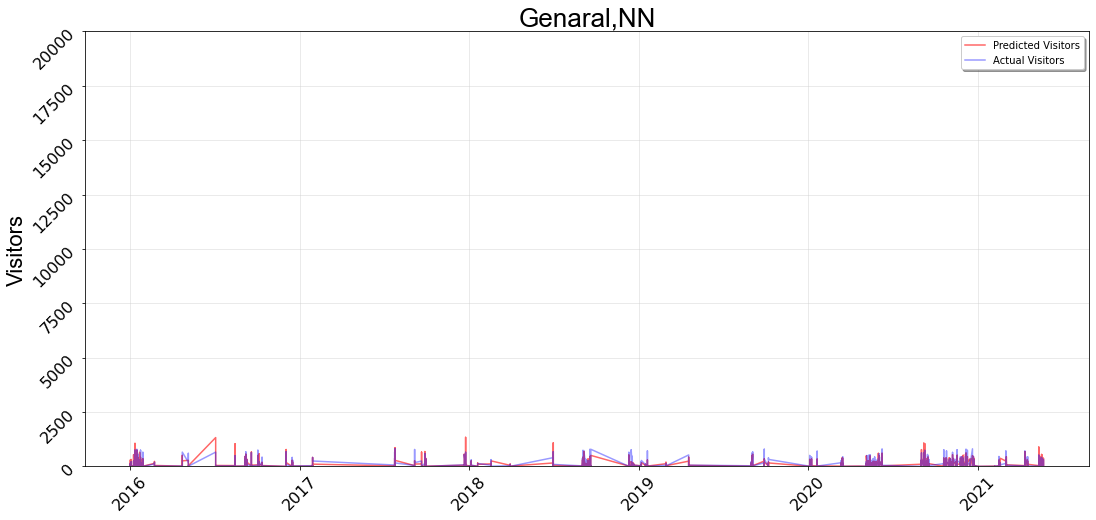

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


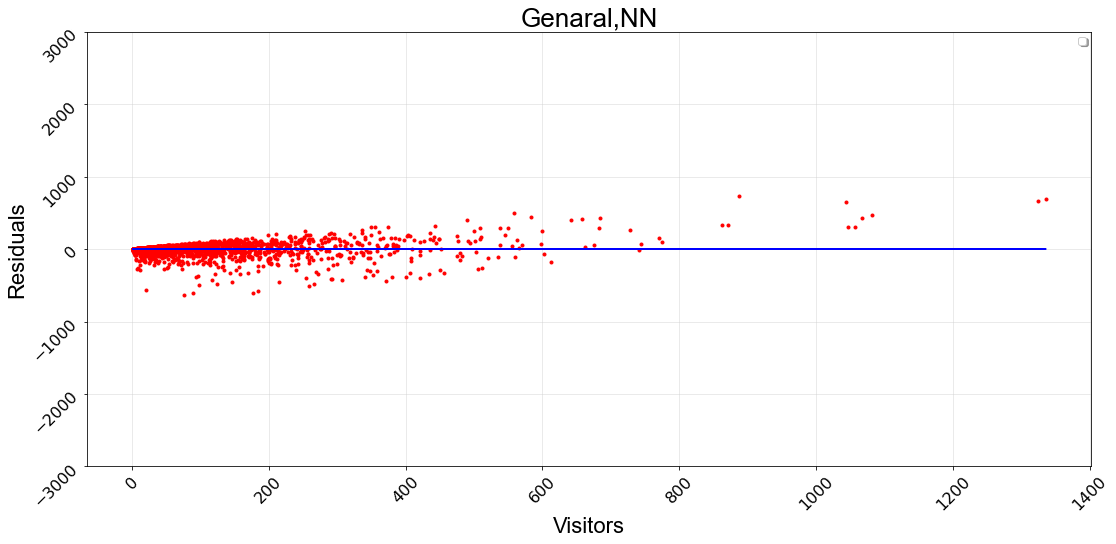

In [10]:


title='Genaral,NN'
print('rmse',function.get_rmse(res.Prediction, res.Actual))
print('std',np.std(res.Actual))
res.sort_index(inplace=True)
function.plot_line(res.Prediction, res.Actual,alpha_actual=0.4,alpha_prediction=0.6,ylim=(0,20000),title=title)
function.plot_residuals(res.Prediction, res.Actual,ylim=(-3000,3000),title=title)
